# Running simple circuits to compare UNM with IBM QPUs

## Imports and general functions

In [1]:
%cd ../project/unified_noise_model
from Unified_Noise_Model import Unified_Noise_Model
from qiskit_ibm_provider import IBMProvider
%cd ../../QPL_experiment
from qiskit.circuit.random import random_circuit
import matplotlib.pyplot as plt
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, quantum_info,transpile
from qiskit.tools.visualization import plot_histogram,plot_bloch_vector
from numpy import pi

C:\Users\Adriano\Desktop\Facultad\Facultad\Trabajos\QuantumQuipu\Noise and native gates\QuantumQuipu_NoiseAndNativeGates\Codigo\project\unified_noise_model
C:\Users\Adriano\Desktop\Facultad\Facultad\Trabajos\QuantumQuipu\Noise and native gates\QuantumQuipu_NoiseAndNativeGates\Codigo\QPL_experiment


In [16]:
random_circuit(3,1).draw()

┌────────────┐
q_0: ─────┤ Rx(3.5658) ├
     ┌───┐└─────┬──────┘
q_1: ┤ S ├──────┼───────
     └───┘      │       
q_2: ───────────■───────

In [2]:
token = '825a8b2e6fb861f63088f866e59357e49447b4b9b24ff6136e56dcc28f2fb0cedda6c2976b9e2aef48129a80864265494be7f8a7aae5b9ebd6654a7d80d9b5cb'

## Experiment

In [3]:
IBMProvider.save_account(token= token, overwrite=True)
provider = IBMProvider()
print(provider.backends())

[<IBMBackend('ibm_kyoto')>, <IBMBackend('ibm_osaka')>, <IBMBackend('ibmq_qasm_simulator')>, <IBMBackend('simulator_extended_stabilizer')>, <IBMBackend('simulator_mps')>, <IBMBackend('simulator_statevector')>, <IBMBackend('simulator_stabilizer')>, <IBMBackend('ibm_brisbane')>]


In [4]:
backend = provider.get_backend('ibm_brisbane')

unm = Unified_Noise_Model()
unm.add_calibration_data(str("./ibm_brisbane.csv"),['id', 'rz', 'sx', 'x'],['ecr'],backend)
#unm.print_calibration_data()
unm.add_all_noise_channels2()

simulator = AerSimulator()
noisy_simulator = AerSimulator(noise_model=unm.noise_model)

Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence

C:\Users\Adriano\anaconda3\envs\quantum\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


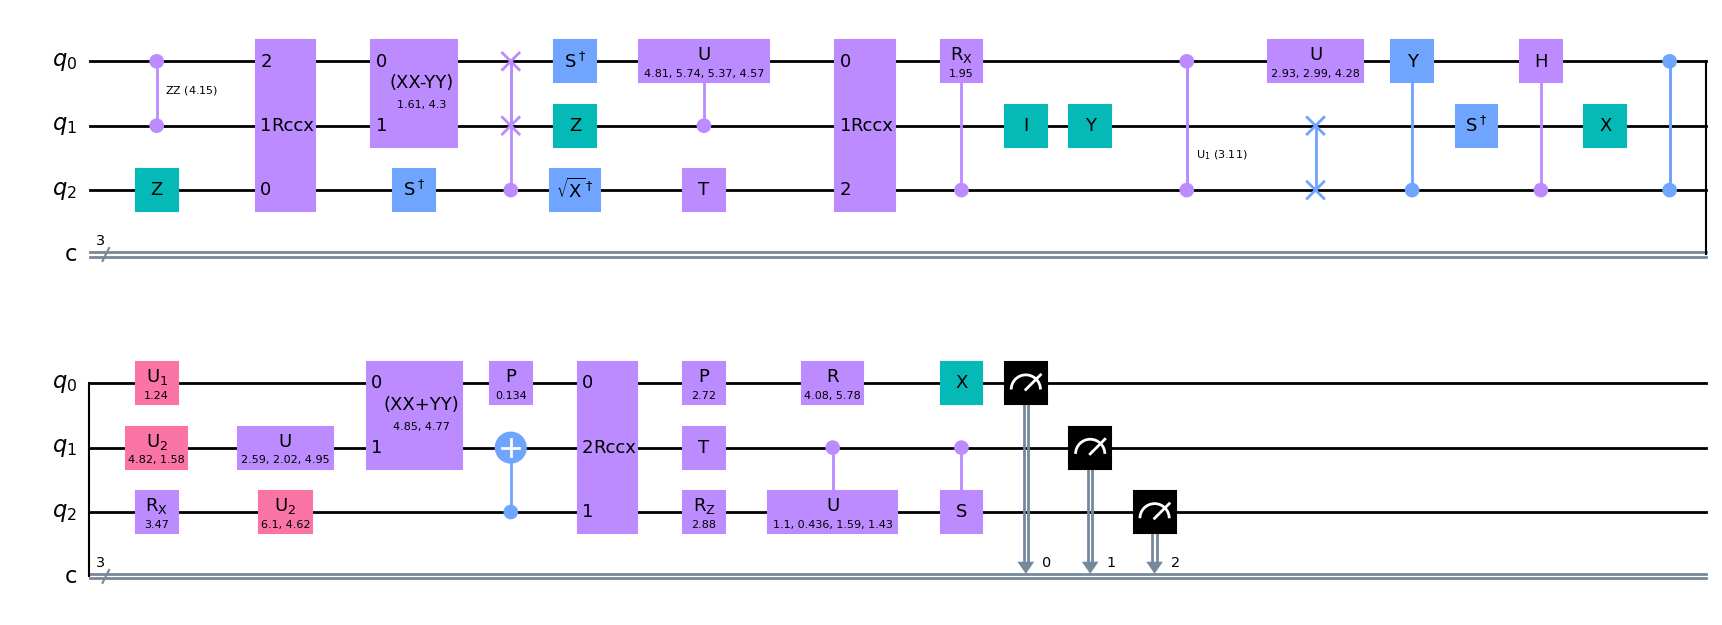

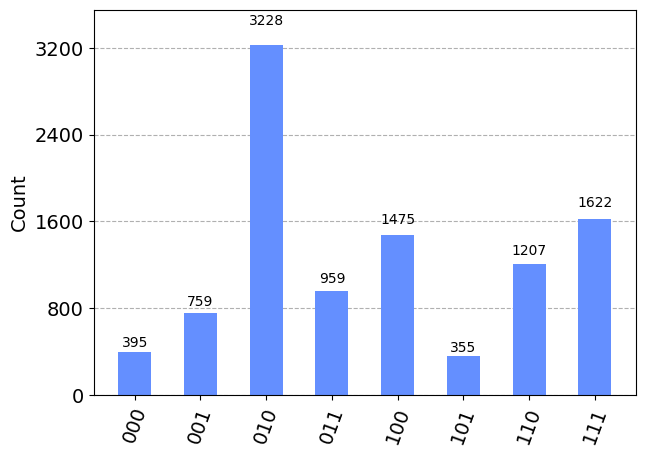

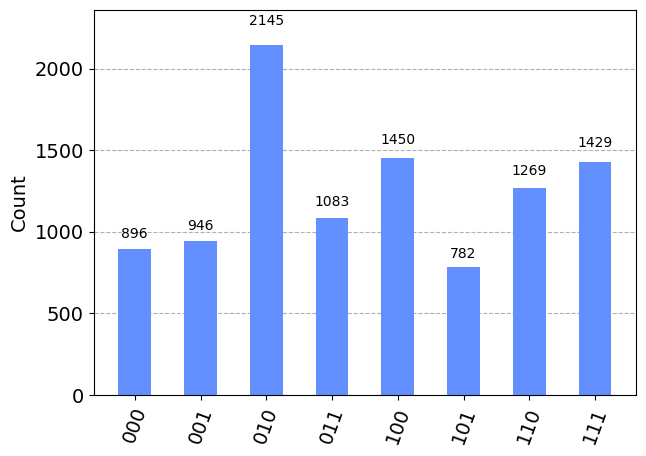

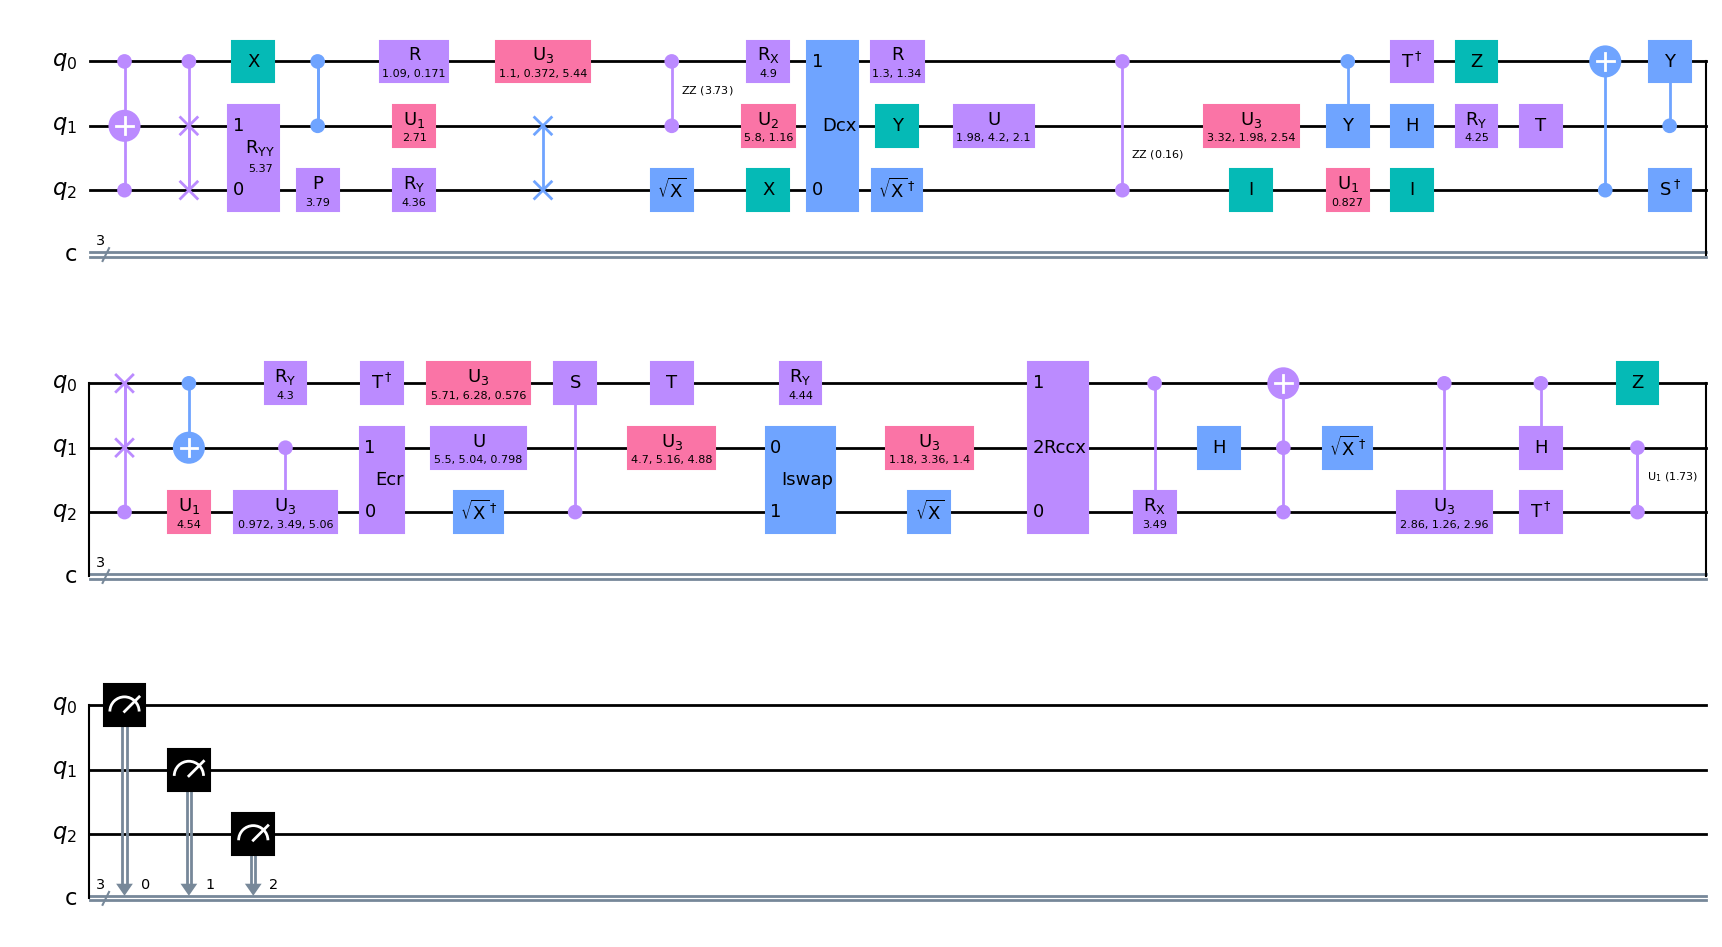

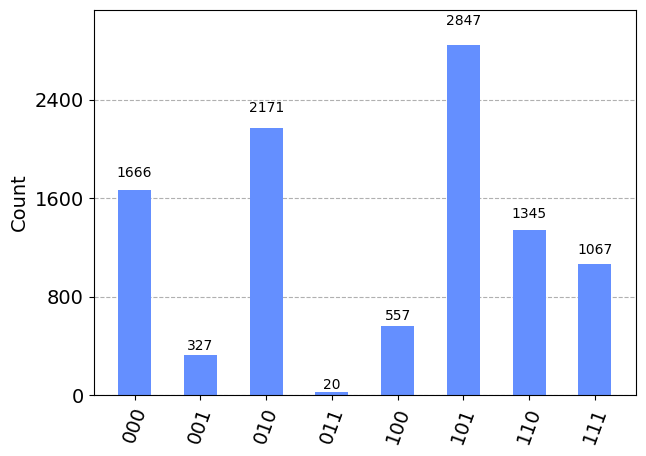

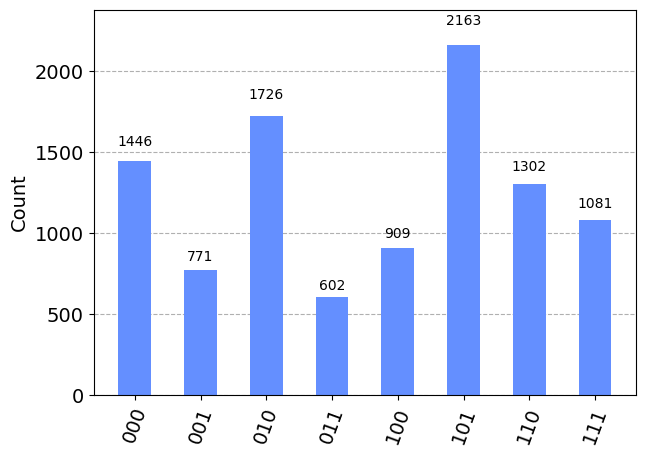

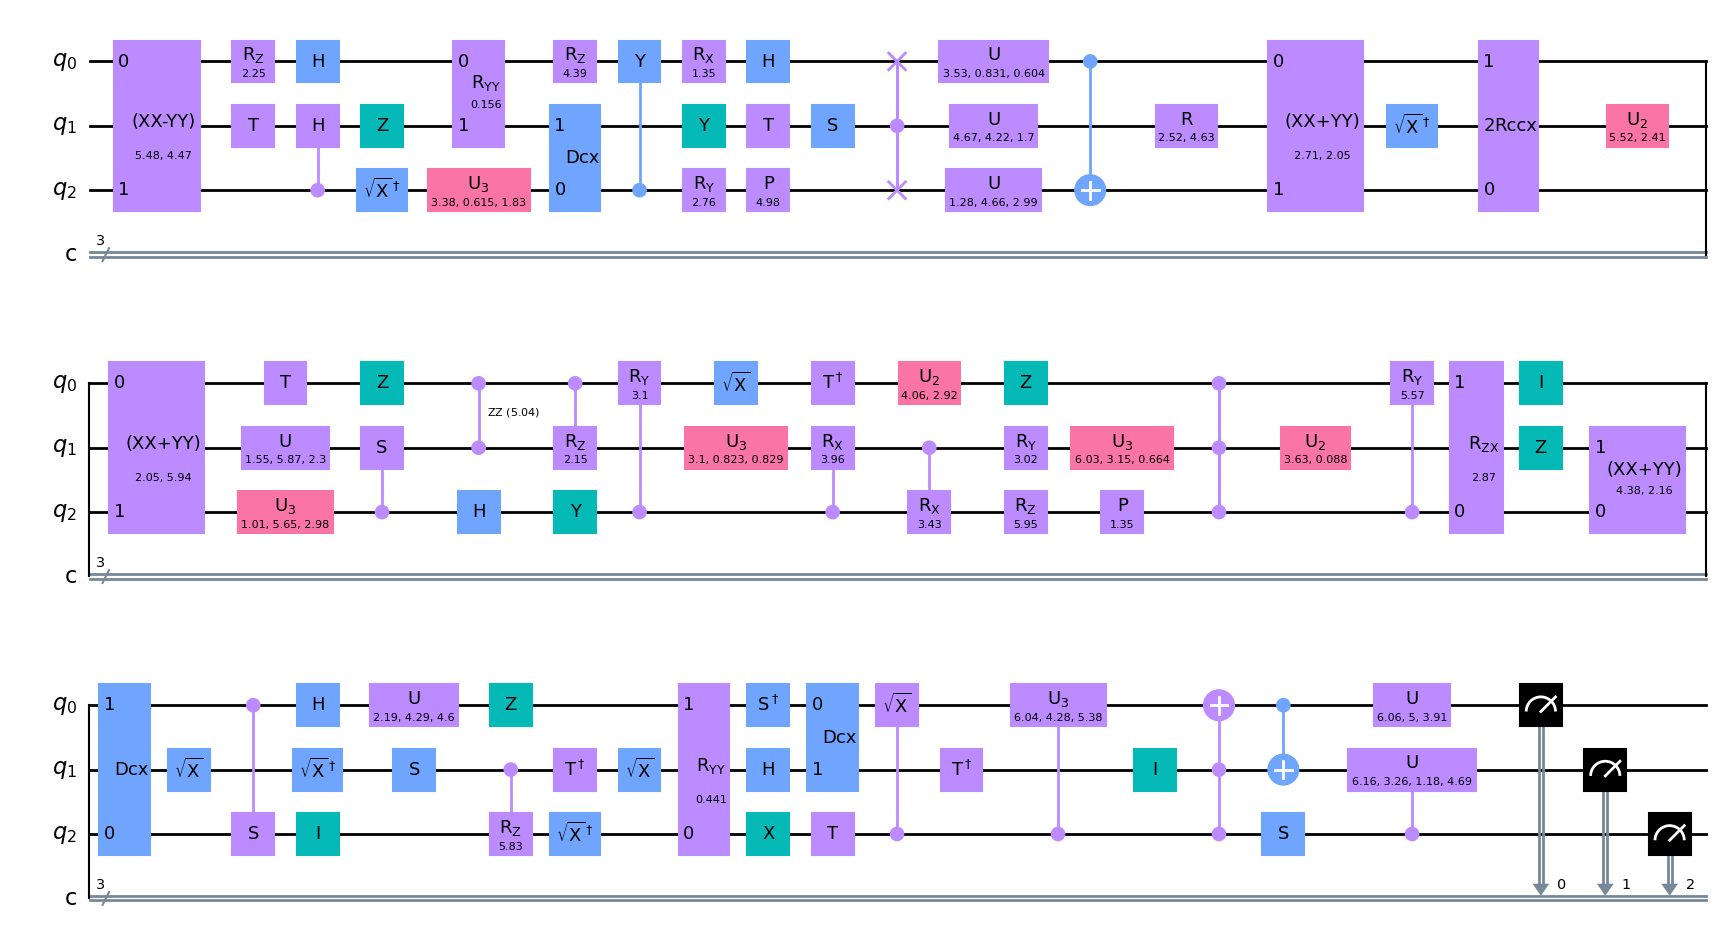

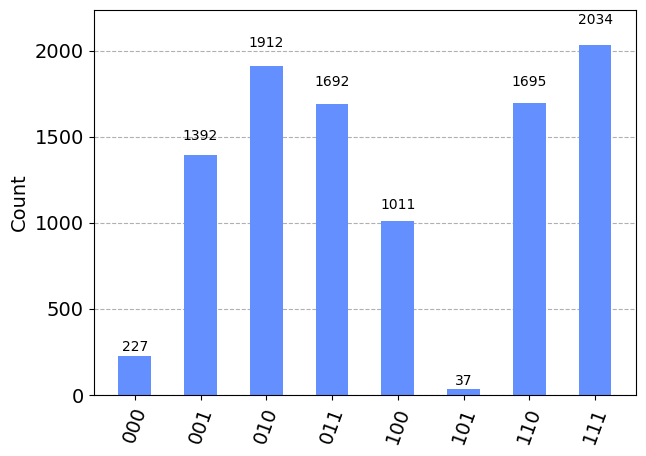

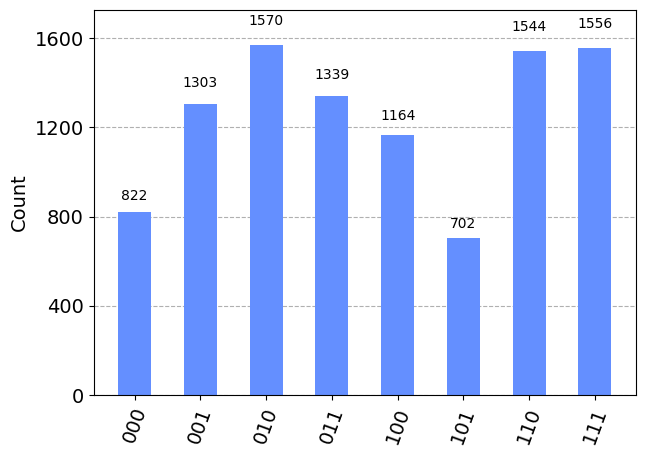

In [5]:
qc_depths = [20,30,40]

all_counts = {}
circuits = {}
for depth in qc_depths:
    # create and transpile the circuit
    qc = random_circuit(3,depth , measure=True)
    
    display(qc.draw('mpl'))
    circuits[str(depth)] = qc
    
    qc = transpile(qc, backend,basis_gates=['id', 'rz', 'sx', 'x','cx'])
    
    # get all counts
    all_counts[str(depth)] = {}
    
    counts = simulator.run(qc,shots=10000).result().get_counts(0)
    all_counts[str(depth)]['ideal'] = counts
    
    sim_counts = noisy_simulator.run(qc,shots=10000).result().get_counts(0)      
    all_counts[str(depth)]['sim'] = sim_counts
    
    display(plot_histogram(counts))
    display(plot_histogram(sim_counts))

In [6]:
display(all_counts)
display(circuits)

{'20': {'ideal': {'001': 759,
   '111': 1622,
   '110': 1207,
   '010': 3228,
   '100': 1475,
   '011': 959,
   '000': 395,
   '101': 355},
  'sim': {'111': 1429,
   '100': 1450,
   '001': 946,
   '101': 782,
   '011': 1083,
   '010': 2145,
   '110': 1269,
   '000': 896}},
 '30': {'ideal': {'100': 557,
   '101': 2847,
   '010': 2171,
   '110': 1345,
   '000': 1666,
   '001': 327,
   '111': 1067,
   '011': 20},
  'sim': {'010': 1726,
   '111': 1081,
   '110': 1302,
   '000': 1446,
   '011': 602,
   '101': 2163,
   '100': 909,
   '001': 771}},
 '40': {'ideal': {'001': 1392,
   '011': 1692,
   '111': 2034,
   '110': 1695,
   '000': 227,
   '010': 1912,
   '100': 1011,
   '101': 37},
  'sim': {'011': 1339,
   '001': 1303,
   '100': 1164,
   '111': 1556,
   '000': 822,
   '110': 1544,
   '010': 1570,
   '101': 702}}}

{'20': <qiskit.circuit.quantumcircuit.QuantumCircuit at 0x1e563a70c70>,
 '30': <qiskit.circuit.quantumcircuit.QuantumCircuit at 0x1e564647f70>,
 '40': <qiskit.circuit.quantumcircuit.QuantumCircuit at 0x1e55f5b1af0>}

In [20]:
from qiskit.qasm2 import dump
dump(circuits['40'],'./ibm_brisbane_randomcircuit_depth40')

In [9]:
pasado = [1,5,10,20,30]
for depth in qc_depths:
    print(depth)
    if depth in pasado:
        continue
    qc = circuits[str(depth)]
    qc = transpile(qc, backend,basis_gates=['id', 'rz', 'sx', 'x','ecr'])
    
    qpu_counts = backend.run(qc,shots=10000).result().get_counts(0)
    all_counts[str(depth)]['qpu'] = qpu_counts

20
30
40


KeyboardInterrupt: 

In [52]:
circuits['1'].draw()

┌───┐        ┌─┐      
q_0: ───────┤ S ├────────┤M├──────
            └─┬─┘        └╥┘┌─┐   
q_1: ─────────■───────────╫─┤M├───
     ┌──────────────────┐ ║ └╥┘┌─┐
q_2: ┤ U2(3.698,5.9775) ├─╫──╫─┤M├
     └──────────────────┘ ║  ║ └╥┘
c: 3/═════════════════════╩══╩══╩═
                          0  1  2